In [1]:
import cv2
import numpy as np 
import random
import math

import octree
from PIL import Image

file_path   = "./images/test2.jpg"
output_path = "./images/output2.png"

In [2]:
#### Load Image
def load_image(file_path=""):
    test_image = Image.open(file_path)

    width,height = test_image.size
    if width >= height:
        width, height = 4096, int(height/width*4096)
    else:
        width, height = int(width/height*4096), 4096
    new_image = test_image.resize((width, height))
    resized_image = np.array(new_image)

    output_image = np.zeros((4096, 4096, 3))
    if resized_image.shape[1] == 4096:
        start_row = (4096-resized_image.shape[0])//2
        output_image[start_row: start_row+resized_image.shape[0], :] = resized_image[:,:,:]
    else:
        start_col = (4096-resized_image.shape[1])//2
        output_image[:, start_col:start_col+resized_image.shape[1]] = resized_image[:,:,:]

    Blue, Green, Red = output_image[:,:,2].reshape(-1), \
                       output_image[:,:,1].reshape(-1), \
                       output_image[:,:,0].reshape(-1)

    return Blue, Green, Red

#### Load Indexes
def load_indexes():
    points = [2048, 2048]  # half of the size
    def index_func(index):
        x, y = index % 4096, index / 4096
        offset = (random.random() - 0.5) * 512
        return min(math.hypot(x - a, y - b) for a, b in points) + offset
    indexes = np.arange(4096*4096)
    random.shuffle(indexes)
    return indexes 

def create_image_data(colors):
    result = [None] * (4096 * 4096)
    for index, (r, g, b) in enumerate(colors):
        result[index] = chr(r) + chr(g) + chr(b)
    return ''.join(result)


In [3]:
Blue, Green, Red = load_image(file_path)
indexes = load_indexes()
tree = octree.Octree()

colors = [(0, 0, 0)] * (4096 * 4096)

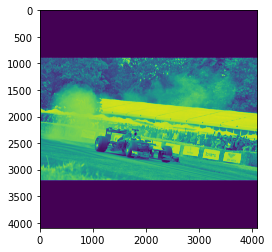

In [4]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(Green.reshape(4096, 4096))

In [5]:
for i, index in enumerate(indexes):
    if i % (65536*32) == 0:
        pct = 100.0 * i / (4096*4096)
        print ('{:2.2f} percent complete'.format(pct))
    colors[index] = tree.pop(int(Red[index]), int(Green[index]), int(Blue[index]))

0.00 percent complete
12.50 percent complete
25.00 percent complete
37.50 percent complete
50.00 percent complete
62.50 percent complete
75.00 percent complete
87.50 percent complete


In [6]:
data = create_image_data(colors)
print ('creating output image')

creating output image


In [9]:
data = np.array(colors).reshape((4096, 4096,3))

In [10]:
im = Image.fromarray(data.astype(np.uint8), 'RGB')
im.save(output_path)

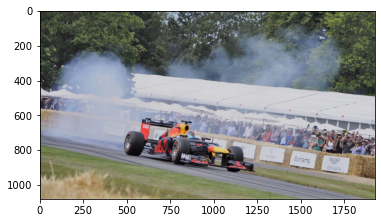

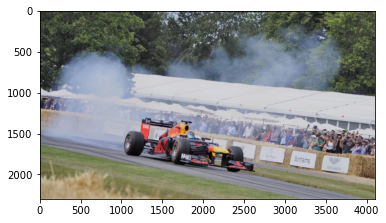

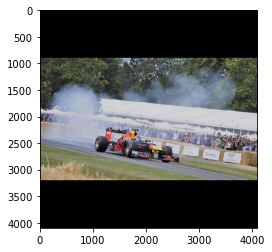

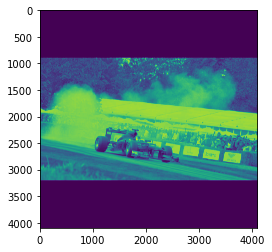

In [11]:
from matplotlib import pyplot as plt
test_image = plt.imread(file_path)
fig, ax = plt.subplots()
im = ax.imshow(test_image)

test_image = Image.open(file_path)
width, height = test_image.size
if width >= height:
    width, height = 4096, int(height/width*4096)
else:
    width, height = int(width/height*4096), 4096

resized_image = test_image.resize((width, height))

fig, ax = plt.subplots()
im = ax.imshow(resized_image)

output_image = np.zeros((4096, 4096, 3))
resized_image = np.array(resized_image)
if resized_image.shape[1] == 4096:
    start_row = (4096-resized_image.shape[0])//2
    output_image[start_row: start_row+resized_image.shape[0], :] = resized_image[:,:,:]
else:
    start_col = (4096-resized_image.shape[1])//2
    output_image[:, start_col:start_col+resized_image.shape[1]] = resized_image[:,:,:]
output_image = output_image.astype(np.uint8)
fig, ax = plt.subplots()
im = ax.imshow(output_image)

Blue, Green, Red = output_image[:,:,2].reshape(-1), \
                       output_image[:,:,1].reshape(-1), \
                       output_image[:,:,0].reshape(-1)

fig, ax = plt.subplots()
im = ax.imshow(Blue.reshape((4096,4096)))